## Időjárás-előrejelzési adatkészlet vizsgálata

A több, mint 2500 időjárás-megfigyelést tartalmazó adathalmaz feldolgozásával csapadék előfordulására szeretnénk előrejelzést adni  különböző időjárási körülmények alapján. A gépi tanulás osztályozási technikáit használjuk az elemzéshez. A scikit-learn Python könyvtárból a logisztikus regresszió, a döntési fák és számos más algoritmus alkalmazásával valamint különböző adatvizualizálási eszközökkel dolgozunk.

Nincs információnk arról, hogy milyen dátum és időpontokban mérték a jellemzőket, de azt tudjuk, hogy az adatok időrendi sorrendben vannak. Néhány esetben az adatok hiányosak vagy tévedésből többszörösen rögzítettek lehetnek. Az első oszlopban az adott mérés sorszáma szerepel (Id). Az adatállomány a következő időjárási jellemzők mért értékeit tartalmazza:

Temperature: hőmérséklet (Celsius fok)

Humidity: a levegő páratartalma (%-ban megadva)

Wind_Speed: a szél erőssége (km/h)

Cloud_Cover: az égbolt felhővel való fedettsége (%-ban megadva)  

Pressure: a légnyomás értéke (hPa)

Rain: 'rain', ha esik az eső ill. 'no rain', ha nem esik az eső.


##A megoldandó feladat leírása:

A #-tel kezdődő és ?-eket tartalmazó kódban a ? helyére mindig be kell írni a hiányzó kódrészletet, amivel a feladatban kért eredményt el lehet érni. Ezután aktívvá kell tenni a kódsort és végre kell hajtani.



## Importálás

Első lépésként importáljuk a Numpy, Pandas, Seaborn és Matplotlib.pyplot könyvtárakat az adatbeolvasáshoz, adatelőkészítéshez és adatvizualizációhoz. Használjuk a szokásos rövidítéseket alias name-ként az egyes könyvtárakhoz (np, pd, sns és plt).

In [1]:
# A szükséges könyvtárak importálása

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



## Adatok betöltése és betekintés a DataFrame-be

Töltsük be a weather_forecast_data nevű CSV adatfájlunk tartalmát egy df nevű DataFrame-be, és jelenítsük meg a df első 5 és utolsó 5 darab sorát.

Ezek után meg kell vizsgálnunk, hogy szükséges-e adattisztítási lépéseket elvégeznünk.

In [5]:
# Adatok beolvasása és megjelenítése
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/python/weather_forecast_data.csv')
print("Az első 5 sor:")
print(df.head())
print("\nAz utolsó 5 sor:")
print(df.tail())

# Adatok alapvető információi
print("\nAdatok alapvető információi:")
print(df.info())

# Hiányzó értékek száma
print("\nHiányzó értékek száma oszloponként:")
print(df.isnull().sum())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Az első 5 sor:
   Id  Temperature   Humidity  Wind_Speed  Cloud_Cover     Pressure     Rain  \
0   1    23.720338  89.592641    7.335604    50.501694  1032.378759     rain   
1   2    27.879734  46.489704    5.952484     4.990053   992.614190  no rain   
2   3    25.069084  83.072843    1.371992    14.855784  1007.231620  no rain   
3   1    23.720338  89.592641    7.335604    50.501694  1032.378759     rain   
4   5          NaN  89.592641    7.335604    50.501694  1032.378759     rain   

   Extra_column  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN  

Az utolsó 5 sor:
        Id  Temperature   Humidity  Wind_Speed  Cloud_Cover     Pressure  \
2501  2505    14.789275  57.908105    2.374717     2.378743  1046.501875   
2502  2503    27.558479  46.481744   10.884915    39.715133  1008.590961   
2503  2504    28.1082

Írassuk ki, hogy hány adatsorunk van a dataFrame-ben.


In [6]:
# Adatsorok száma
print(f"A DataFrame adatsorainak száma: {len(df)}")

A DataFrame adatsorainak száma: 2506


Írassuk ki azt az információt, amely megadja azt, hogy az oszlopokban milyen típusú értékek szerepelnek, valamint megmutatja az oszlopokban szereplő NaN értékek számát is.

In [7]:
# Informácó a DataFrame adatairól
df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506 entries, 0 to 2505
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2506 non-null   int64  
 1   Temperature   2505 non-null   float64
 2   Humidity      2506 non-null   float64
 3   Wind_Speed    2505 non-null   float64
 4   Cloud_Cover   2506 non-null   float64
 5   Pressure      2506 non-null   float64
 6   Rain          2505 non-null   object 
 7   Extra_column  0 non-null      float64
dtypes: float64(6), int64(1), object(1)
memory usage: 156.8+ KB


Ellenőrizzük az isnull().sum() metódussal, hogy melyik oszlopban hány darab NaN érték található.

In [8]:
# Oszloponként a NaN értékek darabszáma
# oszlopokban szereplő NaN értékek száma
print("Hiányzó értékek száma oszloponként:")
print(df.isnull().sum())

Hiányzó értékek száma oszloponként:
Id                 0
Temperature        1
Humidity           0
Wind_Speed         1
Cloud_Cover        0
Pressure           0
Rain               1
Extra_column    2506
dtype: int64


## Adattisztítás
Töröljük ki a kizárólag NaN-t tartalmazó DataFrame 'Extra_column' nevű oszlopát, valamint törüljük ki az 'Id' nevű oszlopot is.

In [9]:
# A fölösleges oszlopok eltávolítása
df = df.dropna(axis=1, how='all')
df = df.drop(columns=['Id'])

Ellenőrizzük, hogy sikeres volt-e a törlés.

In [10]:
# Ellenőrzés
df.columns

Index(['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure',
       'Rain'],
      dtype='object')

Írjuk ki, hogy ezek után összesen hány helyen van hiányzó adat a DataFrame-ben.

In [11]:
# Összesen hány darab NaN érték van
#df.isnull().sum().?()
missing_values = df.isnull().sum().sum()
print(f"Összesen {missing_values} hiányzó adat található a DataFrame-ben.")

Összesen 3 hiányzó adat található a DataFrame-ben.


Mivel számottevően nem fog módosulni az adatmennyiség, ezért töröljük ki a NaN értékeket tartalmazó sorokat.

Töröljük ki a duplikált sorokat is (ha vannak ilyenek).

Írassuk ki az adattisztítási lépések után, hogy hány sor található a DataFrame-ben.

In [12]:
# A NaN értékeket tartalmazó sorok és a duplikált sorok törlése
df = df.dropna()
df = df.drop_duplicates()
print(f"A tisztított DataFrame sorainak száma: {len(df)}")

A tisztított DataFrame sorainak száma: 2500


## Adatok megjelenítése különböző szempontok szerint - Adatvizualizáció

Alkalmazzuk a Seaborn könyvtár különböző diagramkészítő metódusait hisztogramok, boxplot-ok, vonal- és scatter diagramok valamint egyéb megjelenítési lehetőségek bemutatására.

Először jelenítsük meg a Seaborn könyvtár countplot() metódusával az esős ill. a nem esős napok számát. A megadott kódban szereplő ?-ek helyére írjuk be a hiányzó kódrészletet.

<ipython-input-14-33b908560efe>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rain', data=df, palette=['blue', 'gold'])


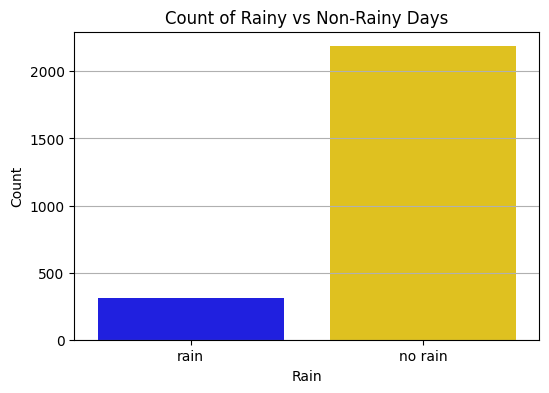

In [14]:
# Az esős ill. a nem esős napok számának megjelenítése
plt.figure(figsize=(6, 4))
# sns.countplot(x='?', data=df, hue='Rain', palette=['blue','gold'])
sns.countplot(x='Rain', data=df, palette=['blue', 'gold'])
plt.title('Count of Rainy vs Non-Rainy Days')
plt.xlabel('Rain')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()


Következő lépésként vizsgáljuk meg a felhővel borítottságot a 'Cloud_Cover' oszlop adatai alapján. Ehhez illesszünk egy új oszlopot a DataFrame-hez 'Outlook' névvel. Ebben jelenjen meg a 'sunny' kifejezés, ha a felhővel fedettség 15%-nál kisebb, a 'very cloudy' érték ha 70%-nál nagyobb és az 'overcast' az egyéb esetekben.

In [15]:
# Az Outlook oszlop generálása
conditions = [
    (df['Cloud_Cover'] < 15),
    (df['Cloud_Cover'] > 70)
]
choices = ['sunny', 'very cloudy']
df['Outlook'] = np.select(conditions, choices, default='overcast')
df

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain,Outlook
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain,overcast
1,27.879734,46.489704,5.952484,4.990053,992.614190,no rain,sunny
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain,sunny
8,23.622080,74.367758,7.050551,67.255282,982.632013,rain,overcast
9,20.591370,96.858822,4.643921,47.676444,980.825142,no rain,overcast
...,...,...,...,...,...,...,...
2500,21.791602,45.270902,11.807192,55.044682,1017.686181,no rain,overcast
2502,27.558479,46.481744,10.884915,39.715133,1008.590961,no rain,overcast
2503,28.108274,43.817178,2.897128,75.842952,999.119187,no rain,very cloudy
2504,14.789275,57.908105,2.374717,2.378743,1046.501875,no rain,sunny


A felhővel borítottság megjelenítésére használjuk a Seaborn könyvtár countplot() metódusát az Outlook oszlop elemeire. A színpalettát állítsuk be a gold (sunny), darkgrey (very cloudy) és skyblue (overcast) értékekre.

<ipython-input-16-aad28a750cd6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outlook', data=df, palette={'sunny': 'gold', 'very cloudy': 'darkgrey', 'overcast': 'skyblue'})


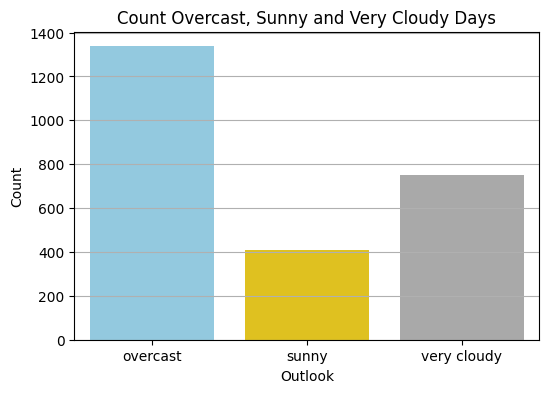

In [16]:
# Az Outlook oszlop kategóriáinak megjelenítése
plt.figure(figsize=(6, 4))
sns.countplot(x='Outlook', data=df, palette={'sunny': 'gold', 'very cloudy': 'darkgrey', 'overcast': 'skyblue'})
plt.title('Count Overcast, Sunny and Very Cloudy Days')
plt.xlabel('Outlook')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()


## Az adatok eloszlásának megjelenítése

Jelenítsük meg 2 soros és 3 oszlopos többszörös diagramként (subplot) a hőmérséklet, páratartalom, szélsebesség, felhővel borítottság és a légnyomás értékek gyakoriságát a Seaborn histplot() metódusával, amellyel a KDE adatsűrűségi görbét is kirajzoljuk. Az adattartományt minden esetben 30 sávra osszuk fel.
A megadott kódban a ?-ek helyére írjuk be amegfelelő értékeket.

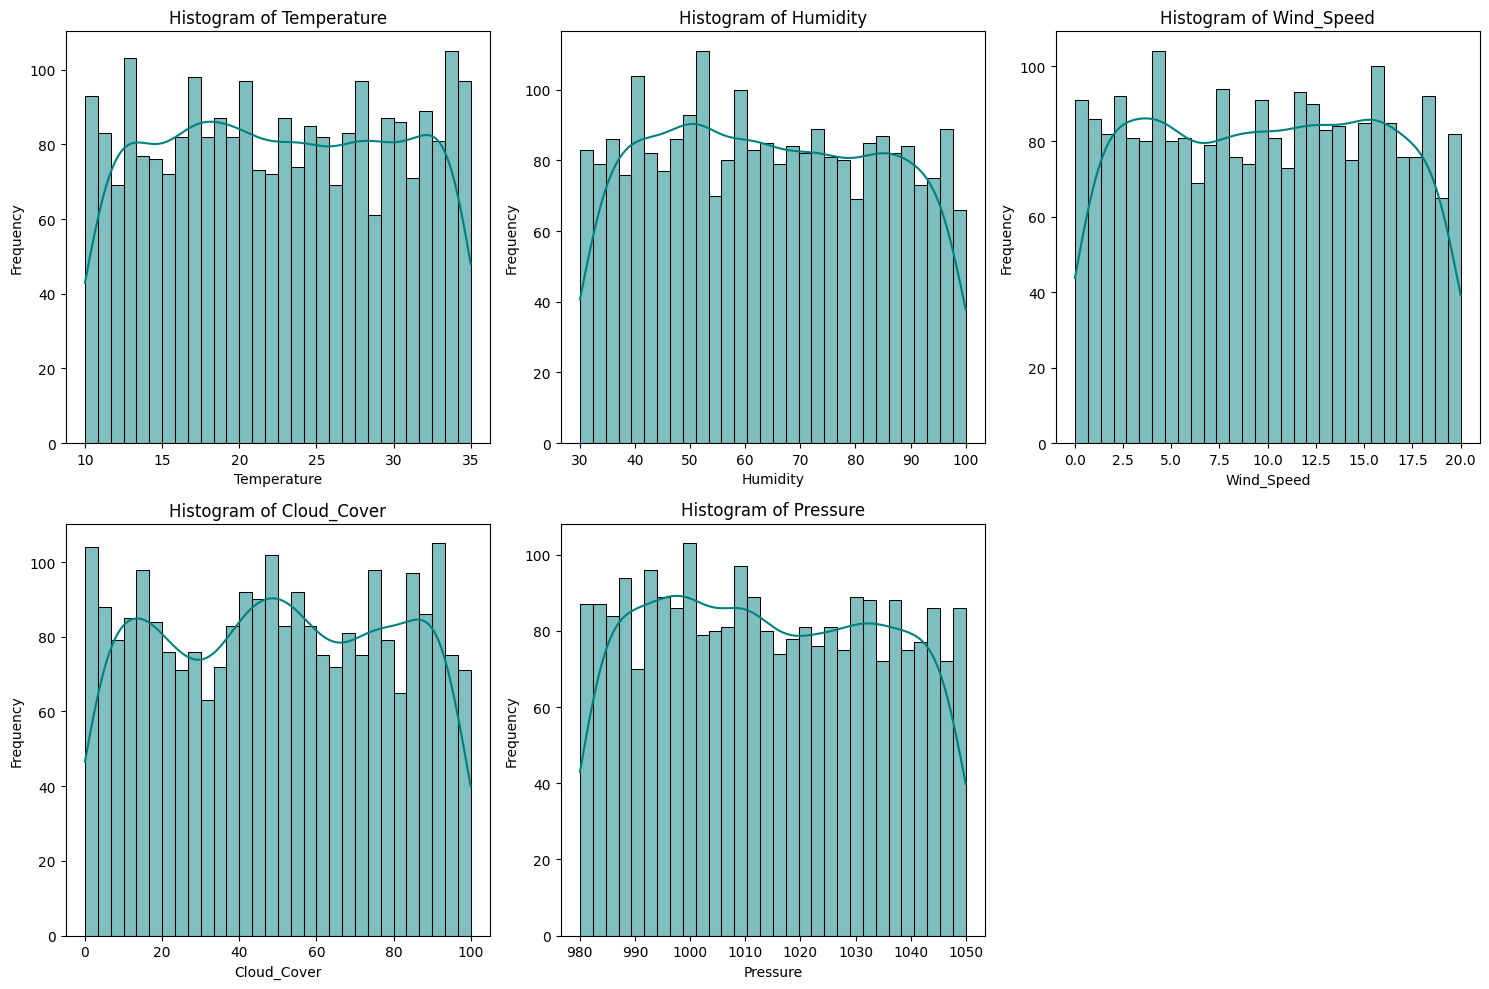

In [18]:
#Hisztogramok megjelenítése a Temperature, Humidity, Wind Speed, Cloud Cover és Pressure oszlopokra KDE-vel
plt.figure(figsize=(15, 10))
features = ['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure']

for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], kde=True, bins=30, color='teal')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Statisztika készítése és megjelenítése
Határozzuk meg a DataFrame numerikus oszlopainak statisztikai jellemzőit a describe() metódussal.

In [19]:
# Statisztikai táblázat a numerikus adatokra
df.describe()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,22.581725,64.347094,9.906255,49.658104,1014.312336
std,7.326996,19.954739,5.780316,29.123104,20.196433
min,10.001842,30.005071,0.009819,0.015038,980.014486
25%,16.359398,47.339815,4.761909,23.900016,996.938630
50%,22.536448,63.920797,9.908572,49.488284,1013.433035
75%,28.976476,81.561021,14.948408,75.324140,1031.735067
max,34.995214,99.997481,19.999132,99.997795,1049.985593


Jelenítsük meg egy 3 soros és 2 oszlopos elrendezésű subplot-ban a numerikus oszlopok terjedelmét, mediánját és kvartiliseit a Seaborn boxplot diagramjával.

A boxplot-okat minden esetben a Rain oszlop értékei szerinti csoportosításban, skyblue és tomato színekkel ábrázoljuk.
Írjuk be a ?-ek helyére a hiányzó kulcssszavakat és paramétereket.

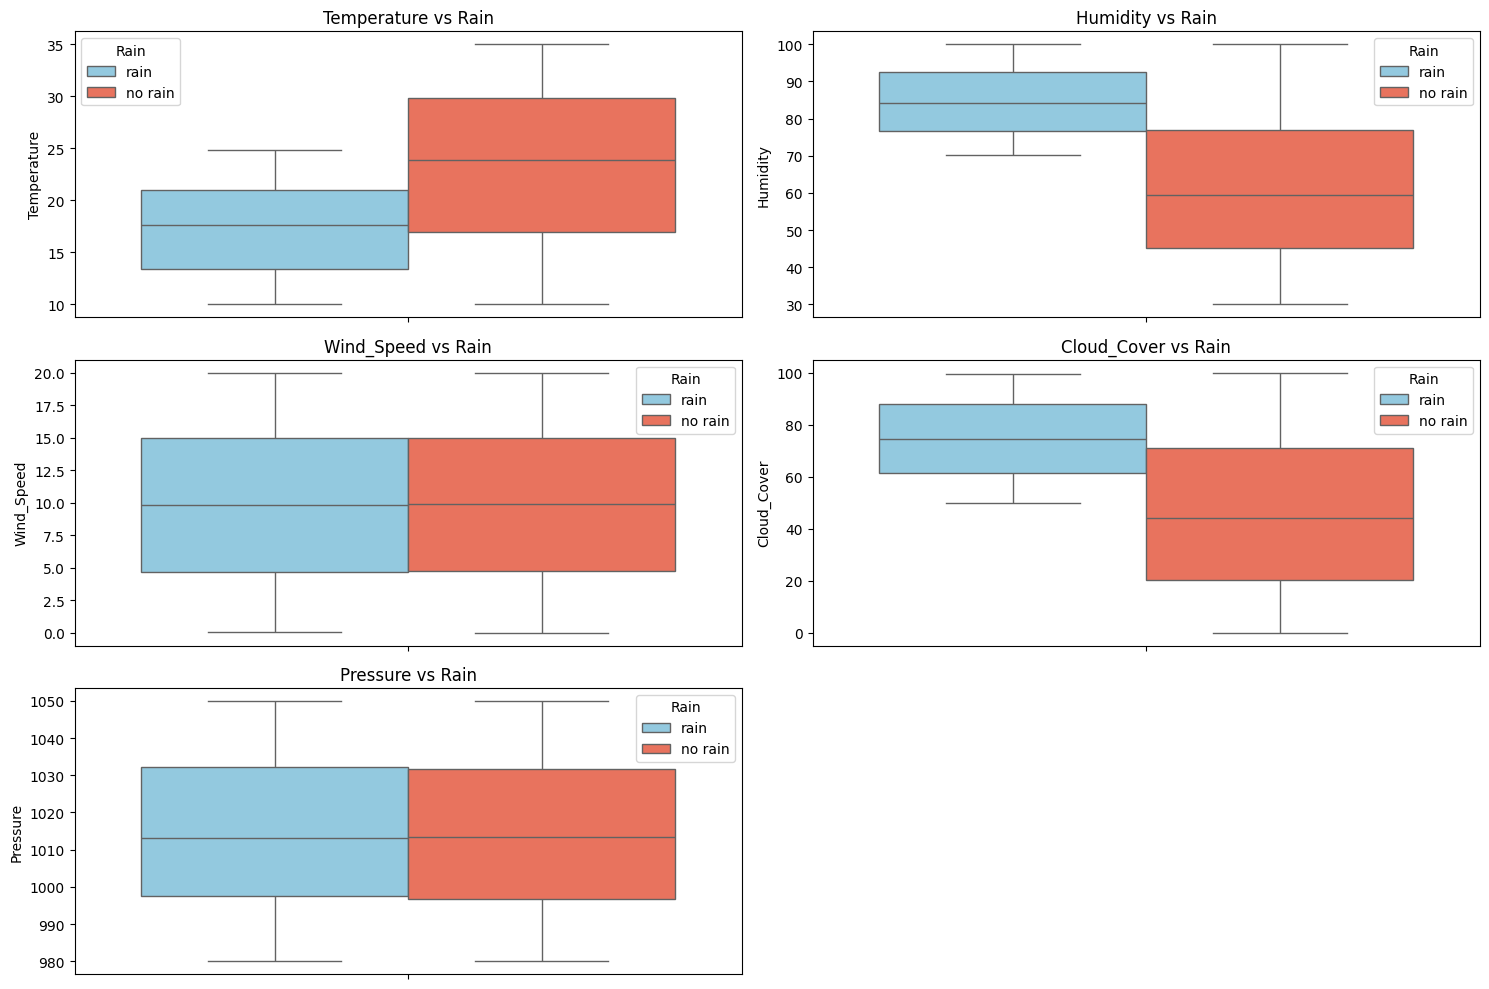

In [20]:
# Boxplot-ok megjelenítése a Temperature, Humidity, Wind Speed, Cloud Cover és Pressure oszlopokra Rain szerinti csoportosítással
plt.figure(figsize=(15, 10))
#for i, column in ?(df.columns[:-2]):
    #plt.subplot(?, ?, i + 1)
    #sns.boxplot(?, y=column, ?=df, hue='Rain', palette=['?','?'])
for i, column in enumerate(df.columns[:-2]):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(y=column, data=df, hue='Rain', palette=['skyblue', 'tomato'])
    plt.title(f'{column} vs Rain')
plt.tight_layout()
plt.show()

## Az adatok közötti kapcsolatok megjelenítése
Ebben a részben további adatmegjelenítési lehetőségeket mutatunk be. Scatter diagram és vonaldiagram bemutatásával tesszük szemléletessé az adatainkat.

Első lépésként jelenítsük meg a DataFrame numerikus értékeit a Seaborn pairplot() metódusával coolwarm színpalettával a Rain oszlop értékei szerinti csoportosításban.
A ?-ek helyére írjuk be a hiányzó kódrészleteket.

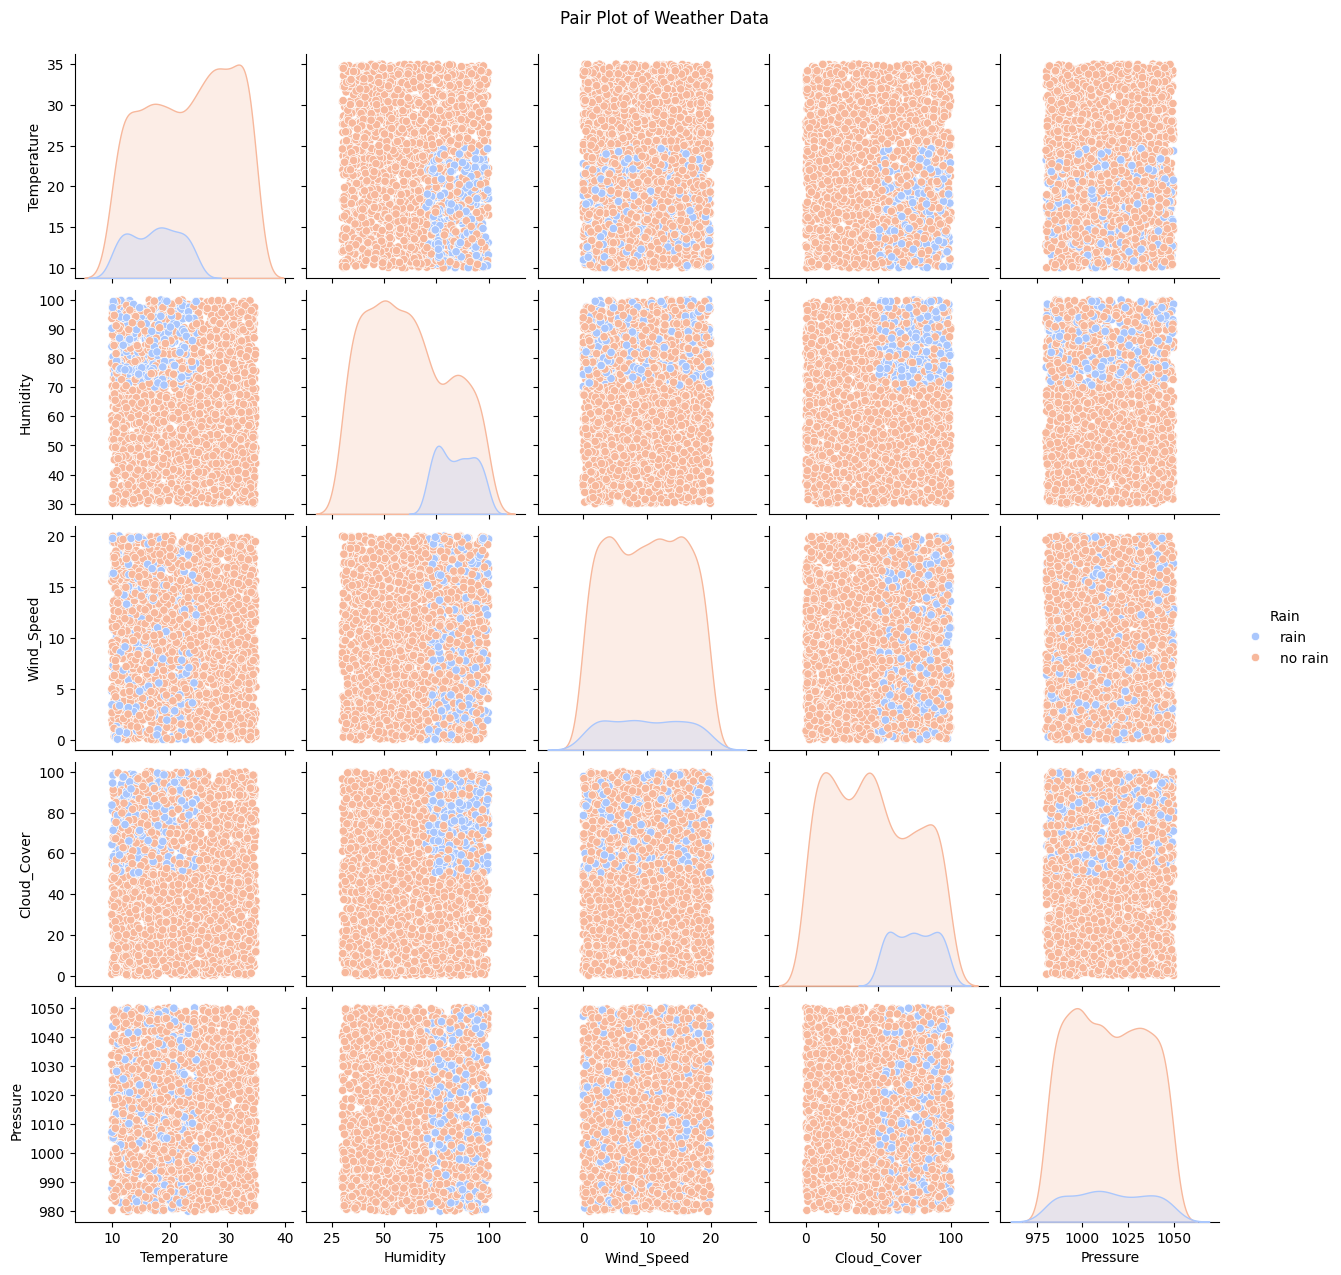

In [21]:
# Pairplot diagram ábrázolása a Rain oszlop szerinti csoportosítással
sns.pairplot(df, hue='Rain', palette='coolwarm')
plt.suptitle('Pair Plot of Weather Data', y=1.02)
plt.show()

Következő lépésként rajzoljunk overlay vonaldiagramot a hőmérséklet és a páratartalom mérésenkénti értékeinek bemutatásásra. Használjuk a Matplotlib könyvtár plot metódusát a két grafikon közös diagramban történő ábrázolásához. A Humidity oszlop értékeinek megjelenítéséhez a 'skyblue' szín használjuk és írjuk be a hiányzó kódrészleteket a ?-ek helyére.

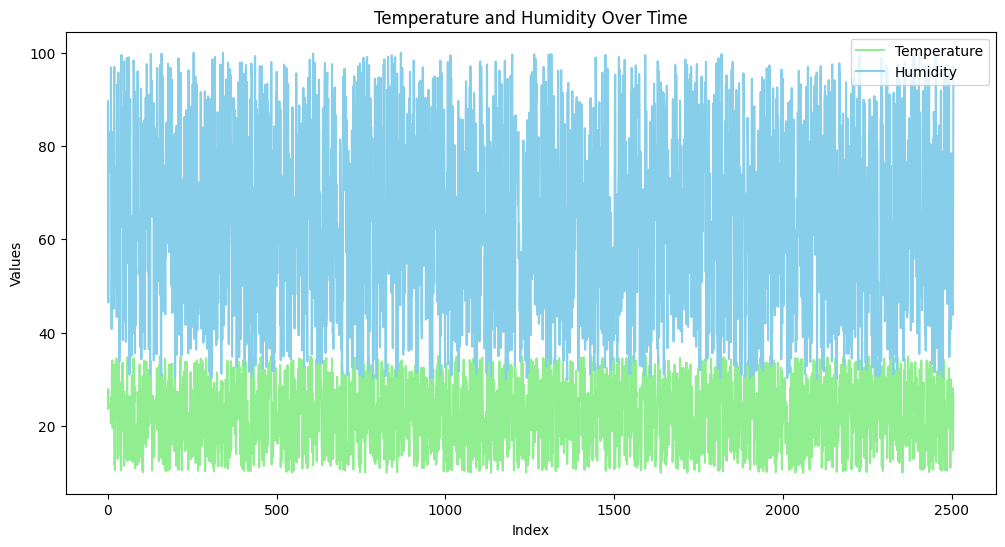

In [22]:
# Vonaldiagram: a Temperature és a Humidity megjelenítése az Index oszlop szerinti sorrendben
plt.figure(figsize=(12, 6))

# Temperature line plot
plt.plot(df['Temperature'], label='Temperature', color='lightgreen')
plt.plot(df['Humidity'], label='Humidity', color='skyblue')

plt.title('Temperature and Humidity Over Time')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.show()

Jelenítsük meg a hőmérséklet és a páratartalom közti kapcsolatot a Seaborn scatterplot() és kdeplot() metódusaival a Rain oszlop értékei szerinti bontásban.
helyezzük el egy 1 sor 2 oszlopos subplot-ban a két diagramot.

A ?-ek helyére írjuk be a hiányzó kódrészleteket.

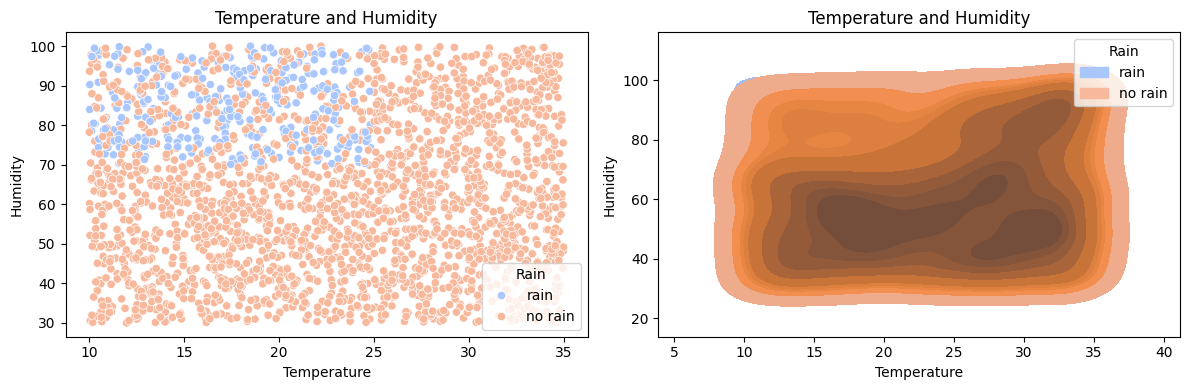

In [23]:
# Scatter diagram és  KDE diagram a  Temperature és a Humidity értékek kapcsolatára
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.title('Temperature and Humidity')
sns.scatterplot(x=df['Temperature'], y=df['Humidity'], hue=df['Rain'], palette='coolwarm')

plt.subplot(1, 2, 2)
plt.title('Temperature and Humidity')
sns.kdeplot(x=df['Temperature'], y=df['Humidity'], hue=df['Rain'], fill=True, palette='coolwarm')


plt.tight_layout()
plt.show()


## A DataFrame mentése CSV fájlba

Mentsük el a vizsgált df DataFrame-et a cleaned_weather_data.csv fájlba a Pandas to_csv() metódusával, az Index oszlop mellőzésével.

In [26]:
# df mentése CSV fájlba
df.to_csv('cleaned_weather_data.csv', index=False)

## Korreláció vizsgálata
A korreláció vizsgálatához készítsünk egy df_new új DataFrame-et a cleaned_weather_data.csv adatainak beolvasásával.

A df_new DataFrame-et egészítsük ki egy új Rain_code nevű oszloppal, amelybe írjuk be az 1 értéket ha esett az eső, ill. a 0 értéket, ha nem esett az eső.

Írjuk be a ?-ek helyére a hiányzó kódrészleteket. Jelenítsük meg a new_df első 10 adatsorát.



In [27]:
# Adatok beolvasása és a Rain_code oszlop feltöltése
df_new = pd.read_csv('cleaned_weather_data.csv')

df_new['Rain_code'] = df_new['Rain'].apply(lambda x: 1 if x == 'Yes' else 0)
df_new.head(10)


,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain,Outlook,Rain_code
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain,overcast,0
1,27.879734,46.489704,5.952484,4.990053,992.614190,no rain,sunny,0
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain,sunny,0
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain,overcast,0
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain,overcast,0
5,26.147353,48.217260,15.258547,59.766279,1049.738751,no rain,overcast,0
6,20.939680,40.799444,2.232566,45.827508,1014.173766,no rain,overcast,0
7,32.294325,51.848471,2.873621,92.551497,1006.041733,no rain,very cloudy,0
8,34.091569,48.057114,5.570206,82.524873,993.732047,no rain,very cloudy,0
9,19.586038,82.978293,5.760537,98.014450,1036.503457,rain,very cloudy,0


A df_new DataFrame-ben töröljük ki a Rain és az Outlook oszlopokat.

In [28]:
del df_new['Rain']
del df_new['Outlook']
df_new.head()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain_code
0,23.720338,89.592641,7.335604,50.501694,1032.378759,0
1,27.879734,46.489704,5.952484,4.990053,992.614190,0
2,25.069084,83.072843,1.371992,14.855784,1007.231620,0
3,23.622080,74.367758,7.050551,67.255282,982.632013,0
4,20.591370,96.858822,4.643921,47.676444,980.825142,0


Hozzuk létre a df_new korrelációs mátrixát egy heatmap diagrammal együtt.

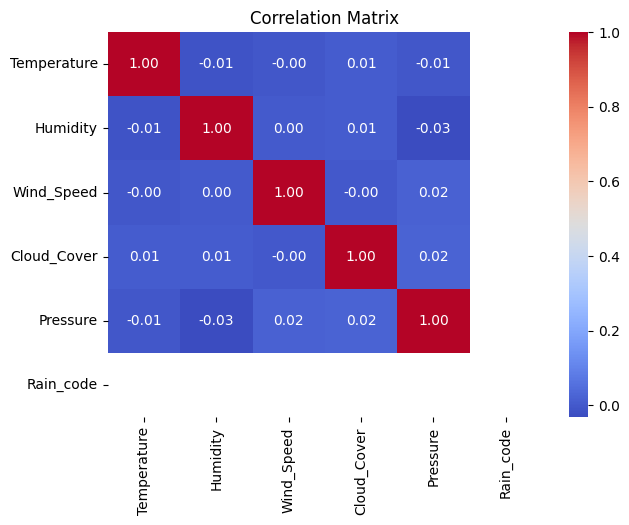

In [29]:
plt.figure(figsize=(7, 5))
sns.heatmap(df_new.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Modellépítés
Elemezzük az adatainkat különböző gépi tanulási algoritmusokkal, hogy előrejelzéseket tudjunk adni a csapadék előfordulására, és hogy feltárjunk esetleges rejtett összefüggéseket az adatok között.
Különböző Sklearn modelleket választunk, ezeket betanítjuk, majd bemutatjuk a pontosságukat. Az eredményeket különböző típusú diagramokon jelenítjük meg.

## A modellépítés lépései:
Importáljuk a szükséges modulokat.
A weather_data nevű új DataFrame-be betöltjük a cleaned_weather_data.csv fájl adatait.
Először kitöröljük az Outlook oszlopot, amit az elemzésben nem kívánunk felhasználni. Következő lépésben konvertáljuk a szöveges adatokat tartalmazó Rain oszlopot numerikussá. Megadjuk a bemeneti halmazt (X), ezek a mért időjárási tényezők és a célértékeket (y) is, ezek a Rain oszlop értékei.

Ezután következik a weather_data DataFrame adatainak felosztása tanító és teszt (train - test) halmazokra 70% és 30% arányban. A bemeneti X_train és X_test halmazokból a StandardScaler modul alkalmazásával skálázott adathalmazokat is készítünk.



In [37]:
# Importálás, adatbetöltés, típuskonvertálás, adatfelosztások, adatskálázás
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Adatok betöltése
weather_data = pd.read_csv('cleaned_weather_data.csv')
del weather_data['Outlook']


# A Rain oszlop adatainak numerikussá alakítása
le = LabelEncoder()
weather_data['Rain'] = le.fit_transform(weather_data['Rain'])


# Adatfelosztás jellemzők (X = features) és célértékek (y = target) szerint
X = weather_data.drop('Rain', axis=1)
y = weather_data['Rain']

# Az adatok felosztása tanító és teszt halmazra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Skálázzuk a bemeneti jellemzőket
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



## A modell alkalmazása

A kiválasztott  ML modellre következik a modell betanítása, az eredmények kiírása, a modell értékelése és az eredmények megjelenítése.

A modellek értékeléséhez megadjuk a pontosságot (accuracy), a konfúziós mátrixot, és megjelenítjük a további metrikák szerinti értékelést is (precision, recall,f1-score,support) a classification_report() metódussal.

A megjelenítéshez mindig az adott modellre jellemző diagramtípus kerül kiválasztásra.

## 1. modell: Logistic Regression

Ezt a modellt a skálázott bemeneti adatokra alkalmazzuk. A tanítást a fit() metódussal végezzük el a bemeneti train halmazra, és a predict() metódussal adunk előrejelzést a kívánt célértékekre.



In [38]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
log_reg_pred = log_reg.predict(X_test_scaled)

# Logistic Regression értékelése
print("Logistic Regression Metrics:")
print(f"  Accuracy: {accuracy_score(y_test, log_reg_pred):.2f}")
print(f"  Confusion Matrix:\n {confusion_matrix(y_test, log_reg_pred)}")
print(classification_report(y_test , log_reg.predict(X_test_scaled)))

Logistic Regression Metrics:
  Accuracy: 0.93
  Confusion Matrix:
 [[643  19]
 [ 36  52]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       662
           1       0.73      0.59      0.65        88

    accuracy                           0.93       750
   macro avg       0.84      0.78      0.81       750
weighted avg       0.92      0.93      0.92       750



A megjelenítést a ROC görbe megrajzolásával végezzük el.

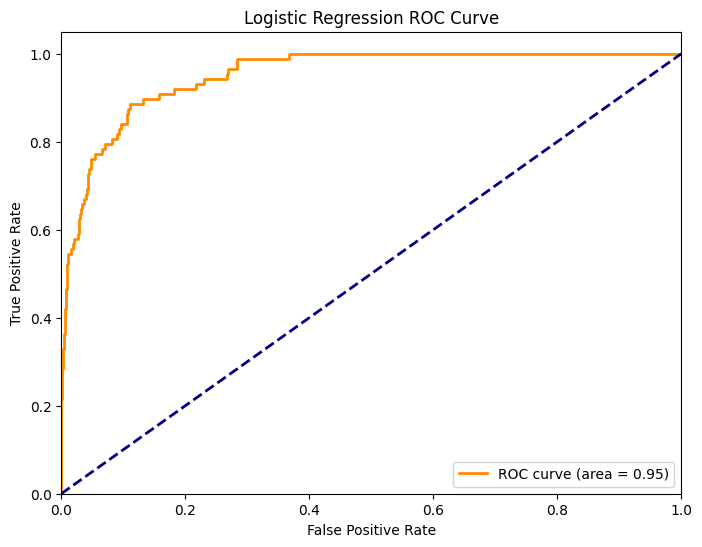

In [39]:
# 2. ROC görbe megjelenítése
from sklearn.metrics import roc_curve, auc
from matplotlib.colors import ListedColormap
log_reg_probs = log_reg.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, log_reg_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend(loc="lower right")
plt.show()

## 2. modell: Support Vector Classifier (SVC)

Ebben az esetben is a skálázott bemeneti adatokkal dolgozunk. A ?-ek helyére írjuk be a hiányzó kódrészleteket.

In [41]:
# Support Vector Classifier (SVC) Model
from sklearn.svm import SVC
svc_clf = SVC()

svc_clf.fit(X_train_scaled, y_train)
svc_clf_pred = svc_clf.predict(X_test_scaled)

# SVC értékelése
print("Support Vector Classifier Metrics:")
print(f"  Accuracy: {accuracy_score(y_test, svc_clf_pred):.2f}")
print(f"  Confusion Matrix:\n {confusion_matrix(y_test, svc_clf_pred)}")
print(classification_report(y_test , svc_clf.predict(X_test_scaled)))

Support Vector Classifier Metrics:
  Accuracy: 0.97
  Confusion Matrix:
 [[651  11]
 [ 11  77]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       662
           1       0.88      0.88      0.88        88

    accuracy                           0.97       750
   macro avg       0.93      0.93      0.93       750
weighted avg       0.97      0.97      0.97       750



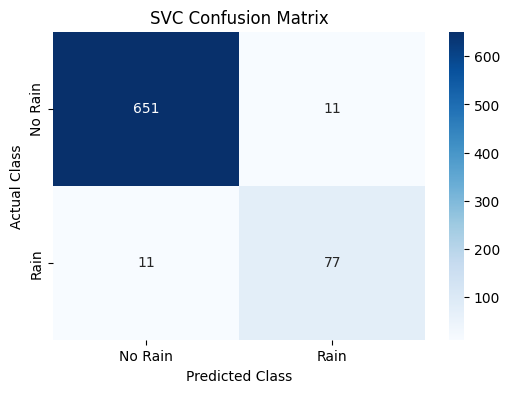

In [42]:
# Confusion Matrix megjelenítése
cm = confusion_matrix(y_test, svc_clf_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No Rain', 'Rain'], yticklabels=['No Rain', 'Rain'])
plt.title("SVC Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()

## 3. modell:  K-Nearest Neighbors

Ebben az esetben is a skálázott bemeneti adatokkal dolgozunk. A ?-ek helyére írjuk be a hiányzó kódrészleteket.

In [43]:
# K-Nearest Neighbors Model
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train_scaled, y_train)
knn_pred = knn_clf.predict(X_test_scaled)

# K-Nearest Neighbors értékelése
print("K-Nearest Neighbors Metrics:")
#print(f"  Accuracy: {?(y_test, knn_pred):.2f}")
print(f"  Accuracy: {accuracy_score(y_test, knn_pred):.2f}")
print(f"  Confusion Matrix:\n {confusion_matrix(y_test, knn_pred)}")
#print(?(y_test , knn_clf.predict(X_test_scaled)))
print(classification_report(y_test, knn_pred))

K-Nearest Neighbors Metrics:
  Accuracy: 0.97
  Confusion Matrix:
 [[651  11]
 [ 13  75]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       662
           1       0.87      0.85      0.86        88

    accuracy                           0.97       750
   macro avg       0.93      0.92      0.92       750
weighted avg       0.97      0.97      0.97       750



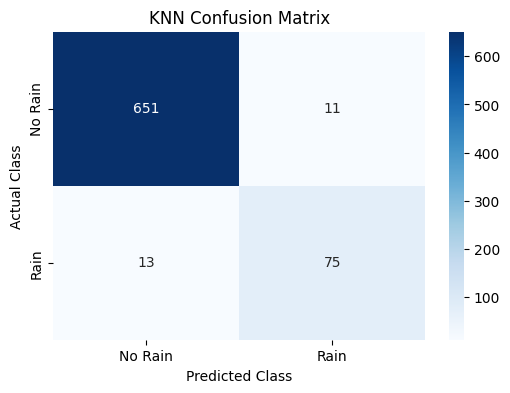

In [44]:
# Confusion Matrix megjelenítése
cm = confusion_matrix(y_test, knn_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No Rain', 'Rain'], yticklabels=['No Rain', 'Rain'])
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()




## 4. modell: Gradient Boosting

Ebben az esetben is a skálázott bemeneti adatokkal dolgozunk. Az eredmény diagram megmutatja, hogy egy bemeneti változónak milyen a fontossága, vagyis, hogy arányosan mennyire járul hozzá a modell előrejelzéseihez.

A ?-ek helyére írjuk be a hiányzó kódrészleteket.

In [45]:
# Gradient Boosting Model
from sklearn.ensemble import GradientBoostingClassifier

#gb_clf = ?(random_state=42)
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train_scaled, y_train)
gb_pred = gb_clf.predict(X_test_scaled)

# Evaluating Gradient Boosting
print("Gradient Boosting Metrics:")
print(f"  Accuracy: {accuracy_score(y_test, gb_pred):.2f}")
print(f"  Confusion Matrix:\n {confusion_matrix(y_test, gb_pred)}")
print(classification_report(y_test , gb_clf.predict(X_test_scaled)))


Gradient Boosting Metrics:
  Accuracy: 1.00
  Confusion Matrix:
 [[662   0]
 [  0  88]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       662
           1       1.00      1.00      1.00        88

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750



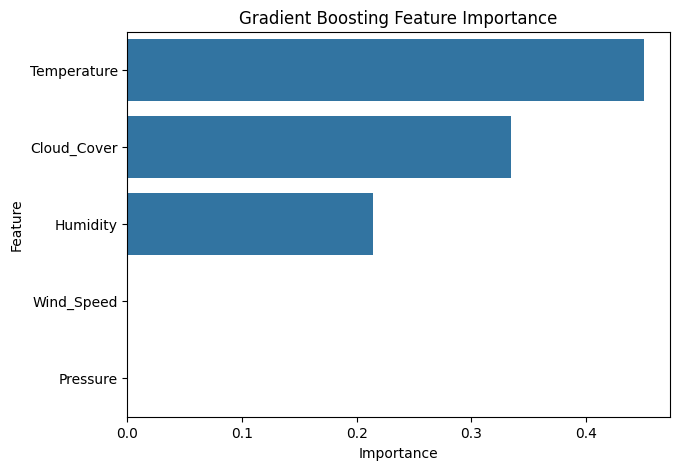

In [46]:
# Megjelenítjük a bemeneti jellemzők fontosságát (Feature Importance Plot)

# feature importances megállapítása
feature_importances = gb_clf.feature_importances_

# Készítünk egy DataFrame-et az ábrázoláshoz
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# feature importances megjelenítése sávdiagrammal
plt.figure(figsize=(7, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Gradient Boosting Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

##5. modell: Decision Tree Classifier

Ebben az esetben is a skálázott bemeneti adatokkal dolgozunk. A tanító fit() metódus alkalmazásakor a criterion = 'entropy' beállítással kiválasztjuk az alkalmazni kívánt döntési szabályt.

A ?-ek helyére írjuk be a hiányzó kódrészleteket.

In [47]:
# Decision Tree Classifier model
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score

#dt_clf = ?(criterion = 'entropy').?(X_train_scaled, y_train)
dt_clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_clf.fit(X_train_scaled, y_train)
#y_pred = dt_clf.?(X_test_scaled)
y_pred = dt_clf.predict(X_test_scaled)
# Decision Tree Classifier értékelése
print("Decision Tree Classifier:")
print(f"  Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"  Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}")
print(classification_report(y_test , dt_clf.predict(X_test_scaled)))


Decision Tree Classifier:
  Accuracy: 1.00
  Confusion Matrix:
 [[662   0]
 [  0  88]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       662
           1       1.00      1.00      1.00        88

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750



[Text(0.3333333333333333, 0.875, 'x[1] <= 0.291\nentropy = 0.555\nsamples = 1750\nvalue = [1524, 226]'),
 Text(0.16666666666666666, 0.625, 'entropy = 0.0\nsamples = 1035\nvalue = [1035, 0]'),
 Text(0.25, 0.75, 'True  '),
 Text(0.5, 0.625, 'x[3] <= -0.004\nentropy = 0.9\nsamples = 715\nvalue = [489.0, 226.0]'),
 Text(0.41666666666666663, 0.75, '  False'),
 Text(0.3333333333333333, 0.375, 'entropy = 0.0\nsamples = 343\nvalue = [343, 0]'),
 Text(0.6666666666666666, 0.375, 'x[0] <= 0.318\nentropy = 0.966\nsamples = 372\nvalue = [146, 226]'),
 Text(0.5, 0.125, 'entropy = 0.0\nsamples = 226\nvalue = [0, 226]'),
 Text(0.8333333333333334, 0.125, 'entropy = 0.0\nsamples = 146\nvalue = [146, 0]')]

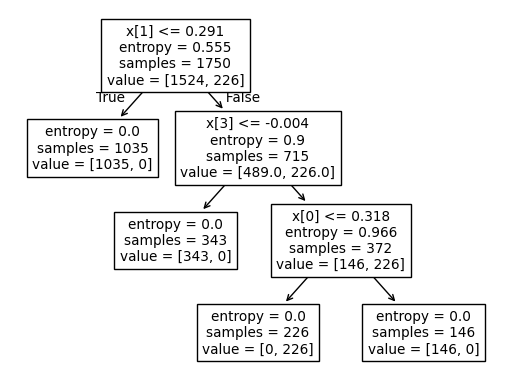

In [48]:
# A döntési fa megjelenítése
plot_tree(dt_clf)